In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
import geopandas as gpd
from geopandas import GeoDataFrame
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import math
import plotly.express as px
from tqdm import tqdm
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter

In [2]:
years = list(range(2002, 2024))
years

[2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [31]:
data = {}
players_data= {}
for year in years:
    url = 'https://www.national-football-teams.com/country/86/'+str(year)+'/India.html'
    page = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
    soup = BeautifulSoup(page.content, 'html.parser')
    pl_table=soup.find('table', class_='table player table-sm table-hover sortable')
    links = pl_table.find_all('a')
    players = []
    scraped_data=[]
    for i in links:
        if '/player/' in i['href']:
            if '/player/picture' not in i['href']:
                players.append(i['href'])
    #player_year.append(players)
    base = 'https://www.national-football-teams.com'
    for item in players:
        url = base+item
        print(url)
        page = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
        soup = BeautifulSoup(page.content, 'html.parser')

        # Get the name

        divs_name_parent = soup.find('div', class_='col-12 text-center')
        #print(divs_name_parent)
        # Find the span elements with itemprop attributes
        family_name_span = soup.find('span', itemprop='familyName')
        given_name_span = soup.find('span', itemprop='givenName')

        # Extract the text from the span elements
        family_name = family_name_span.text.strip()
        given_name = given_name_span.text.strip()
        full_name = given_name+' '+family_name
        
        # Get the birthplace
        divs_parent = soup.find('div', class_='col-lg-12 col-xl-8 mb-lg text-left')
        #print(divs_parent)
        divs_child = divs_parent.find_all('div', class_="row")
        #print(len(divs_child))
        divs_child = divs_child[len(divs_child)-2].find_all('div', class_="col-6")
        place = divs_child[1].text
        count_letters = sum(1 for char in place if char.isalpha())
        #print(place)
        if count_letters >= 2:
            #print(f"{place} contains letters.")
            #birthplaces.append(place)
            #place = place.strip()[:-8]
            print(f'Birthplace of player {full_name} is {place}')
            player_info = {"name": full_name, "birthplace": place}
            scraped_data.append(player_info)
        else:
            try:
                print(f"{place} does not contain letters.\n looking for birthplace...")
                divs_child = divs_parent.find_all('div', class_="row")
                divs_child = divs_child[len(divs_child)-1].find_all('div', class_="col-6")
                new_place = divs_child[1].text
                count_letters = sum(1 for char in new_place if char.isalpha())
                #print(count_letters)
                if count_letters >= 2:
                    #new_place = new_place.strip()[:-8]
                    print(f'Birthplace of player {full_name} is {new_place}')
                    player_info = {"name": full_name, "birthplace": new_place}
                    scraped_data.append(player_info)
                else:
                    print(f"Birthplace of player {full_name} not found! Checking further...")
            except:
                #print(f"{place} does not contain letters.\n looking for birthplace...")
                divs_child = divs_parent.find_all('div', class_="row")
                divs_child = divs_child[5].find_all('div', class_="col-6")
                new_place = divs_child[1].text
                #new_place = new_place.strip()[:-8]
                #print(new_place)
                count_letters = sum(1 for char in new_place if char.isalpha())
                #print(count_letters)
                if count_letters >= 2:
                    #new_place = new_place.strip()[:-8]
                    print(f'Birthplace of player {full_name} is {new_place}')
                    player_info = {"name": full_name, "birthplace": new_place}
                    scraped_data.append(player_info)
                else:
                    print(f"Birthplace of player {full_name} not found!!")
        # Update the players_data dictionary with scraped data for the current year
        players_data[year] = scraped_data

        # Optionally, you can update the main data dictionary if needed
        data[year] = players_data[year] 

with open('players_birthplace.json', "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"Scraped data has been written to {file_path}")   

https://www.national-football-teams.com/player/30172/Rajat_Ghosh_Dastidar.html

1979-10-08
 does not contain letters.
 looking for birthplace...
Birthplace of player Rajat Ghosh Dastidar is 
Kolkata
(India)

https://www.national-football-teams.com/player/3109/Sangram_Mukherjee.html

1981-11-06
 does not contain letters.
 looking for birthplace...
Birthplace of player Sangram Mukherjee is 
Kolkata
(India)

https://www.national-football-teams.com/player/3101/Mahesh_Gawli.html

1.77m
 does not contain letters.
 looking for birthplace...
Birthplace of player Mahesh Gawli is 
Panzorconi
(India)

https://www.national-football-teams.com/player/3102/Deepak_Kumar_Mondal.html
Birthplace of player Deepak Kumar Mondal is 
Noamundi
(India)

https://www.national-football-teams.com/player/3097/Samir_Subash_Naik.html
Birthplace of player Samir Subash Naik is 
Mumbai
(India)

https://www.national-football-teams.com/player/3105/Satish_Kumar_Bharti.html

1982-01-26
 does not contain letters.
 looking for

KeyboardInterrupt: 

In [57]:
data

{2002: [{'name': 'Rajat Ghosh Dastidar', 'birthplace': 'Kolkata'},
  {'name': 'Sangram Mukherjee', 'birthplace': 'Kolkata'},
  {'name': 'Mahesh Gawli', 'birthplace': 'Panzorconi'},
  {'name': 'Deepak Kumar Mondal', 'birthplace': '\nNoamundi\n(India)\n'},
  {'name': 'Samir Subash Naik', 'birthplace': '\nMumbai\n(India)\n'},
  {'name': 'Satish Kumar Bharti', 'birthplace': 'Patna'},
  {'name': 'Debjit Ghosh', 'birthplace': 'Kolkata'},
  {'name': 'Arun Kumar Malhotra', 'birthplace': 'Jammu\n(Jammu & '},
  {'name': 'Renedy Singh', 'birthplace': '\nImphal\n(India)\n'},
  {'name': 'Shanmugham Venkatesh', 'birthplace': '\nBengaluru\n(India)\n'},
  {'name': 'Tomba Singh', 'birthplace': '\nImphal\n(India)\n'},
  {'name': 'Jo Paul Ancheri', 'birthplace': '\nThrissur\n(India)\n'},
  {'name': 'Manitombi Singh', 'birthplace': 'Imphal'},
  {'name': 'Krishnan Nair Ajayan', 'birthplace': 'Chadayamangalam'},
  {'name': 'Baichung Bhutia', 'birthplace': '\nTinkitam\n(India)\n'},
  {'name': 'Abhishek Yadav

In [53]:
birthplace=[]
base = 'https://www.national-football-teams.com'
for item in player_year[-1]:
    url = base+item
    print(url)
    page = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
    soup = BeautifulSoup(page.content, 'html.parser')

    # Get the name
with open('players_birthplace.json', "w") as json_file:
    json.dump(data, json_file, indent=4)
    divs_name_parent = soup.find('div', class_='col-12 text-center')
    #print(divs_name_parent)
    # Find the span elements with itemprop attributes
    family_name_span = soup.find('span', itemprop='familyName')
    given_name_span = soup.find('span', itemprop='givenName')

    # Extract the text from the span elements
    family_name = family_name_span.text.strip()
    given_name = given_name_span.text.strip()
    full_name = given_name+' '+family_name
    print("Name:", full_name )
    #print("Family Name:", )
    # Get the birthplace
    divs_parent = soup.find('div', class_='col-lg-12 col-xl-8 mb-lg text-left')
    #print(divs_parent)
    divs_child = divs_parent.find_all('div', class_="row")
    #print(len(divs_child))
    divs_child = divs_child[len(divs_child)-2].find_all('div', class_="col-6")
    place = divs_child[1].text
    place = place.strip()[:-8]
    count_letters = sum(1 for char in place if char.isalpha())
    #print(place)
    if count_letters >= 2:
        #print(f"{place} contains letters.")
        birthplace.append(place)
        print(f'Birthplace of player {full_name} is {place}')
    else:
        try:
            print(f"{place} does not contain letters.\n looking for birthplace...")
            divs_child = divs_parent.find_all('div', class_="row")
            divs_child = divs_child[len(divs_child)-1].find_all('div', class_="col-6")
            new_place = divs_child[1].text
            #print(new_place)
            count_letters = sum(1 for char in new_place if char.isalpha())
            #print(count_letters)
            if count_letters >= 2:
                #print(f"{place} contains letters.")
                birthplace.append(new_place)
                print(f'Birthplace of player {full_name} is {new_place}')
            else:
                print(f"Birthplace of player {full_name} not found!!")
        except:
            print(f"{place} does not contain letters.\n looking for birthplace...")
            divs_child = divs_parent.find_all('div', class_="row")
            divs_child = divs_child[len(divs_child)-1].find_all('div', class_="col-6")
            new_place = divs_child[1].text
            #print(new_place)
            count_letters = sum(1 for char in new_place if char.isalpha())
            #print(count_letters)
            if count_letters >= 2:
                #print(f"{place} contains letters.")
                birthplace.append(new_place)
                print(f'Birthplace of player {full_name} is {new_place}')
            else:
                print(f"Birthplace of player {full_name} not found!!")

https://www.national-football-teams.com/player/42773/Gurpreet_Singh_Sandhu.html
Name: Gurpreet Singh Sandhu
Birthplace of player Gurpreet Singh Sandhu is Chamkaur
https://www.national-football-teams.com/player/68668/Amrinder_Singh.html
Name: Amrinder Singh
Birthplace of player Amrinder Singh is Manolian
https://www.national-football-teams.com/player/82015/Akash_Mishra.html
Name: Akash Mishra
Birthplace of player Akash Mishra is Balrampur
https://www.national-football-teams.com/player/58436/Sandesh_Jhingan.html
Name: Sandesh Jhingan
Birthplace of player Sandesh Jhingan is Chandigarh
https://www.national-football-teams.com/player/86839/Anwar_Ali_1.html
Name: Anwar Ali
Birthplace of player Anwar Ali is Adampur
https://www.national-football-teams.com/player/90435/Mehtab_Singh.html
Name: Mehtab Singh
Birthplace of player Mehtab Singh is Khemkaran
https://www.national-football-teams.com/player/58435/Pritam_Kotal.html
Name: Pritam Kotal
Birthplace of player Pritam Kotal is Uttarpara
https://w

KeyboardInterrupt: 

In [52]:
url = 'https://www.national-football-teams.com/player/3101/Mahesh_Gawli.html'
page = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
soup = BeautifulSoup(page.content, 'html.parser')
divs_parent = soup.find('div', class_='col-lg-12 col-xl-8 mb-lg text-left')
#print(divs_parent)
divs_child = divs_parent.find_all('div', class_="row")
print(len(divs_child))
divs_child = divs_child[5].find_all('div', class_="col-6")
print(divs_child[1].text)

8

Panzorconi
(India)



In [27]:
len([i.strip()[:-8] for i in birthplace])

32

In [58]:
data

{2002: [{'name': 'Rajat Ghosh Dastidar', 'birthplace': 'Kolkata'},
  {'name': 'Sangram Mukherjee', 'birthplace': 'Kolkata'},
  {'name': 'Mahesh Gawli', 'birthplace': 'Panzorconi'},
  {'name': 'Deepak Kumar Mondal', 'birthplace': '\nNoamundi\n(India)\n'},
  {'name': 'Samir Subash Naik', 'birthplace': '\nMumbai\n(India)\n'},
  {'name': 'Satish Kumar Bharti', 'birthplace': 'Patna'},
  {'name': 'Debjit Ghosh', 'birthplace': 'Kolkata'},
  {'name': 'Arun Kumar Malhotra', 'birthplace': 'Jammu\n(Jammu & '},
  {'name': 'Renedy Singh', 'birthplace': '\nImphal\n(India)\n'},
  {'name': 'Shanmugham Venkatesh', 'birthplace': '\nBengaluru\n(India)\n'},
  {'name': 'Tomba Singh', 'birthplace': '\nImphal\n(India)\n'},
  {'name': 'Jo Paul Ancheri', 'birthplace': '\nThrissur\n(India)\n'},
  {'name': 'Manitombi Singh', 'birthplace': 'Imphal'},
  {'name': 'Krishnan Nair Ajayan', 'birthplace': 'Chadayamangalam'},
  {'name': 'Baichung Bhutia', 'birthplace': '\nTinkitam\n(India)\n'},
  {'name': 'Abhishek Yadav

In [12]:
import json
with open('players_birthplace.json') as f:
    data = json.load(f)
data

{'2002': [{'name': 'Rajat Ghosh Dastidar', 'birthplace': 'Kolkata'},
  {'name': 'Sangram Mukherjee', 'birthplace': 'Kolkata'},
  {'name': 'Mahesh Gawli', 'birthplace': '\nPanzorconi\n(India)\n'},
  {'name': 'Deepak Kumar Mondal', 'birthplace': '\nNoamundi\n(India)\n'},
  {'name': 'Samir Subash Naik', 'birthplace': '\nMumbai\n(India)\n'},
  {'name': 'Satish Kumar Bharti', 'birthplace': 'Patna'},
  {'name': 'Debjit Ghosh', 'birthplace': 'Kolkata'},
  {'name': 'Arun Kumar Malhotra', 'birthplace': 'Jammu\n(Jammu & '},
  {'name': 'Renedy Singh', 'birthplace': '\nImphal\n(India)\n'},
  {'name': 'Shanmugham Venkatesh', 'birthplace': '\nBengaluru\n(India)\n'},
  {'name': 'Tomba Singh', 'birthplace': '\nImphal\n(India)\n'},
  {'name': 'Jo Paul Ancheri', 'birthplace': '\nThrissur\n(India)\n'},
  {'name': 'Manitombi Singh', 'birthplace': 'Imphal'},
  {'name': 'Krishnan Nair Ajayan', 'birthplace': 'Chadayamangalam'},
  {'name': 'Baichung Bhutia', 'birthplace': '\nTinkitam\n(India)\n'},
  {'name': 

In [13]:
for year in years:
    try:
        for i in  data[str(year)]:
            if '\n(India)\n' in i['birthplace']:#[1:-9]
                i['birthplace'] = i['birthplace'][1:-9]
    except:
        pass

In [33]:
with open('players_birthplace_refined.json', "w") as json_file:
    json.dump(data, json_file, indent=4)

In [34]:
df_list = []
for year in years:
    try:
        df = pd.DataFrame(data[str(year)])
        df ['year'] = year
        df_list.append(df)
    except:
        pass
master_data = pd.concat(df_list, axis=0)
master_data.head()

,name,birthplace,year
0,Rajat Ghosh Dastidar,Kolkata,2002
1,Sangram Mukherjee,Kolkata,2002
2,Mahesh Gawli,Panzorconi,2002
3,Deepak Kumar Mondal,Noamundi,2002
4,Samir Subash Naik,Mumbai,2002


In [41]:
data['2002']

TypeError: string indices must be integers

In [32]:
data

{'2002': [{'name': 'Rajat Ghosh Dastidar', 'birthplace': 'Kolkata'},
  {'name': 'Sangram Mukherjee', 'birthplace': 'Kolkata'},
  {'name': 'Mahesh Gawli', 'birthplace': 'Panzorconi'},
  {'name': 'Deepak Kumar Mondal', 'birthplace': 'Noamundi'},
  {'name': 'Samir Subash Naik', 'birthplace': 'Mumbai'},
  {'name': 'Satish Kumar Bharti', 'birthplace': 'Patna'},
  {'name': 'Debjit Ghosh', 'birthplace': 'Kolkata'},
  {'name': 'Arun Kumar Malhotra', 'birthplace': 'Jammu\n(Jammu & '},
  {'name': 'Renedy Singh', 'birthplace': 'Imphal'},
  {'name': 'Shanmugham Venkatesh', 'birthplace': 'Bengaluru'},
  {'name': 'Tomba Singh', 'birthplace': 'Imphal'},
  {'name': 'Jo Paul Ancheri', 'birthplace': 'Thrissur'},
  {'name': 'Manitombi Singh', 'birthplace': 'Imphal'},
  {'name': 'Krishnan Nair Ajayan', 'birthplace': 'Chadayamangalam'},
  {'name': 'Baichung Bhutia', 'birthplace': 'Tinkitam'},
  {'name': 'Abhishek Yadav', 'birthplace': 'Kanpur'},
  {'name': 'Mutum Bijen Singh', 'birthplace': 'Imphal'}],
 '2

In [39]:
import json
with open('players_birthplace_refined.json', 'r') as f:
    data = f.read()
with open('players_birthplace_refined_soham.json', 'r') as f1:
    data_soham = f1.read()

In [40]:
# Compare the JSON data
if data == data_soham:
    print("The JSON files are identical.")
else:
    print("The JSON files are not identical.")

The JSON files are identical.


# Plot the map

In [3]:
import pandas as pd
df = pd.read_excel('Football Data Final_Corrected.xlsx', sheet_name='Final Data')
df

,Year,Name,Birth Place,State
0,2002,Rajat Ghosh Dastidar,Kolkata,WEST BENGAL
1,2002,Sangram Mukherjee,Kolkata,WEST BENGAL
2,2002,Mahesh Gawli,Panzorconi,GOA
3,2002,Deepak Kumar Mondal,Noamundi,WEST BENGAL
4,2002,Samir Subash Naik,Mumbai,MAHARASHTRA
...,...,...,...,...
624,2023,Nandhakumar Sekar,Chennai,TAMIL NADU
625,2023,Manvir Singh,Duhre,PUNJAB
626,2023,Bipin Singh,Manipur,MANIPUR
627,2023,Rahim Ali,Barrackpore,WEST BENGAL


In [4]:
df['State'].unique()

array(['WEST BENGAL', 'GOA', 'MAHARASHTRA', 'BIHAR', 'JAMMU AND KASHMIR',
       'MANIPUR', 'KARNATAKA', 'KERALA', 'SIKKIM', 'UTTAR PRADESH',
       'UTTARAKHAND', 'PUNJAB', 'MEGHALAYA', 'MIZORAM', 'ANDHRA PRADESH',
       'CHANDIGARH', 'TAMIL NADU', 'ASSAM', 'HIMACHAL PRADESH', 'HARYANA',
       'DELHI\t\t ', 'JHARKHAND', nan, 'TELANGANA', 'DELHI'], dtype=object)

In [5]:
df = df.dropna()
df['State'].unique()

array(['WEST BENGAL', 'GOA', 'MAHARASHTRA', 'BIHAR', 'JAMMU AND KASHMIR',
       'MANIPUR', 'KARNATAKA', 'KERALA', 'SIKKIM', 'UTTAR PRADESH',
       'UTTARAKHAND', 'PUNJAB', 'MEGHALAYA', 'MIZORAM', 'ANDHRA PRADESH',
       'CHANDIGARH', 'TAMIL NADU', 'ASSAM', 'HIMACHAL PRADESH', 'HARYANA',
       'DELHI\t\t ', 'JHARKHAND', 'TELANGANA', 'DELHI'], dtype=object)

We need to create three maps. 2002-2013, 2014-2019 and 2021-2023.

For this we need to extract the relevant subset of the data and remove the duplicates. 

In [6]:
set_1 = list(range(2002, 2014))
set_2 = list(range(2014, 2020))
set_3 = list(range(2021, 2024))
all_set = set_1+set_2+set_3

Count the number of duplicates

In [7]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [8]:
df_set1 = df[df['Year'].isin(set_1)].reset_index(drop=True)
df_set2 = df[df['Year'].isin(set_2)].reset_index(drop=True)
df_set3 = df[df['Year'].isin(set_3)].reset_index(drop=True)

df_set1 = df_set1.drop_duplicates()
df_set2 = df_set2.drop_duplicates()
df_set3 = df_set3.drop_duplicates()

## Cumulative number of players in each set.

### Set 1 (2002-2013)

In [120]:
df_set1['freq_count'] = df_set1.groupby('State')['State'].transform('count')
# extract the states
df_states_set1 = df_set1[['State','freq_count']].drop_duplicates().reset_index(drop=True)



### Set 2(2014-2019)

In [138]:
df_set2['freq_count'] = df_set2.groupby('State')['State'].transform('count')
# extract the states
df_states_set2 = df_set2[['State','freq_count']].drop_duplicates().reset_index(drop=True)
df_states_set2

,State,freq_count
0,WEST BENGAL,26
1,PUNJAB,25
2,GOA,22
3,MEGHALAYA,7
4,JHARKHAND,5
5,MAHARASHTRA,11
6,TELANGANA,6
7,DELHI\t\t,4
8,MANIPUR,22
9,CHANDIGARH,6


### Set 3(2021-2023)

In [163]:
df_set3.tail(50)

,Year,Name,Birth Place,State,freq_count
49,2022,Jeakson Singh Thounaojam,Thoubal,MANIPUR,18
50,2022,Suresh Singh Wangjam,Manipur,MANIPUR,18
51,2022,Brandon Fernandes,Margao,GOA,14
52,2022,Glan Martins,Goa,GOA,14
53,2022,Danish Farooq,Srinagar,JAMMU AND KASHMIR,1
54,2022,Pronay Halder,Barrackpore,WEST BENGAL,12
55,2022,Harmanjot Khabra,Garhshankar,PUNJAB,13
56,2022,Sunil Chhetri,Secunderabad,TELANGANA,3
57,2022,Manvir Singh,Duhre,PUNJAB,13
58,2022,Ashique Kuruniyan,Malappuram,KERALA,10


In [122]:
df_set3['freq_count'] = df_set3.groupby('State')['State'].transform('count')
# extract the states
df_states_set3 = df_set3[['State','freq_count']].drop_duplicates().reset_index(drop=True)
df_states_set3

,State,freq_count
0,PUNJAB,13
1,WEST BENGAL,12
2,MAHARASHTRA,8
3,MANIPUR,18
4,CHANDIGARH,3
5,UTTAR PRADESH,3
6,GOA,14
7,MIZORAM,5
8,HIMACHAL PRADESH,3
9,KERALA,10


In [123]:
df_states_set3['State'][13]='DELHI'
df_states_set1['State'][20]='DELHI'

/tmp/ipykernel_125713/28483156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_set3['State'][13]='DELHI'
/tmp/ipykernel_125713/28483156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_set1['State'][20]='DELHI'


In [124]:
# map path
map_data = gpd.read_file('India Shapefile With Kashmir/India Shape/india_st.shp')
map_data

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906..."
7,DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20..."
8,DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400..."
9,GOA,"POLYGON ((73.70534 15.71924, 73.83531 15.77222..."


<Axes: >

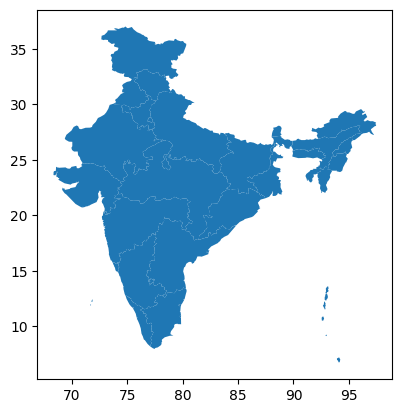

In [125]:
map_data.plot()


In [126]:
other_states = pd.DataFrame([{'State': 'RAJASTHAN', 'freq_count':0},
                {'State': 'ORISSA', 'freq_count':0},
                {'State': 'PONDICHERRY', 'freq_count':0},
                {'State': 'TRIPURA', 'freq_count':0},
                {'State': 'MADHYA PRADESH', 'freq_count':0},
                {'State': 'LAKSHADWEEP', 'freq_count':0},
                {'State': 'GUJARAT', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DADRA AND NAGAR HAVELI', 'freq_count':0},
                {'State': 'ARUNACHAL PRADESH', 'freq_count':0},
                {'State': 'ANDAMAN AND NICOBAR ISLANDS', 'freq_count':0},
                {'State': 'NAGALAND', 'freq_count':0}])

df_states_set1 = pd.concat([df_states_set1, other_states], axis = 0)#.append(other_states, ignore_index=True)
cats=[]
for i in df_states_set1['freq_count']:
    if i==0:
        cat = 'beige'
        cats.append(cat)
    elif 0<i<10:
        cat= 'blueviolet'
        cats.append(cat)
    elif 10<=i<20:
        cat='deepskyblue'
        cats.append(cat)
    elif 20<=i<30:
        cat='goldenrod'
        cats.append(cat)
    elif 30<=i<40:
        cat='lime'
        cats.append(cat)
    elif 40<=i<50:
        cat='palevioletred'
        cats.append(cat)
    #elif 50<i<60:
       # cat='sienna'
        #cats.append(cat)
    else:
        cat='sandybrown'
        cats.append(cat)
print(len(df_states_set1))
print(len(cats))
df_states_set1['category'] = cats
df_states_set1

35
35


,State,freq_count,category
0,WEST BENGAL,67,sandybrown
1,GOA,61,sandybrown
2,MAHARASHTRA,23,goldenrod
3,BIHAR,3,blueviolet
4,JAMMU AND KASHMIR,9,blueviolet
5,MANIPUR,42,palevioletred
6,KARNATAKA,15,deepskyblue
7,KERALA,19,deepskyblue
8,SIKKIM,15,deepskyblue
9,UTTAR PRADESH,9,blueviolet


In [127]:
merged = map_data.set_index('STATE').join(df_states_set1.set_index('State'))#.reset_index(level=0, inplace=True)
merged

,geometry,freq_count,category
STATE,,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",0,beige
ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",9,blueviolet
ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",0,beige
ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",1,blueviolet
BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",3,blueviolet
CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",1,blueviolet
DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906...",0,beige
DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",0,beige
DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",0,beige


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 3600x2400 with 0 Axes>

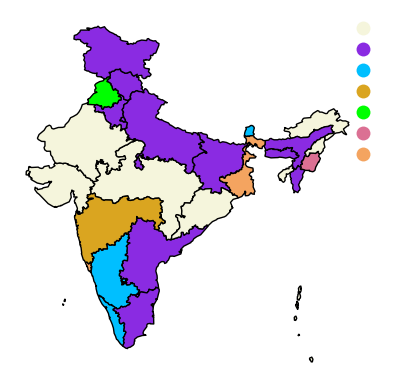

<Figure size 640x480 with 0 Axes>

In [128]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,8), dpi = 300)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue', 'goldenrod', 'lime', 'palevioletred', 'sandybrown']
categories = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
for text in legend.get_texts():
    text.set_text('')
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.1, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)
plt.savefig('/home/debodeep94/OneDrive/Indian researcher/desidata/football/players_2002_13.png',bbox_inches='tight')
#plt.show()


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 60000x36000 with 0 Axes>

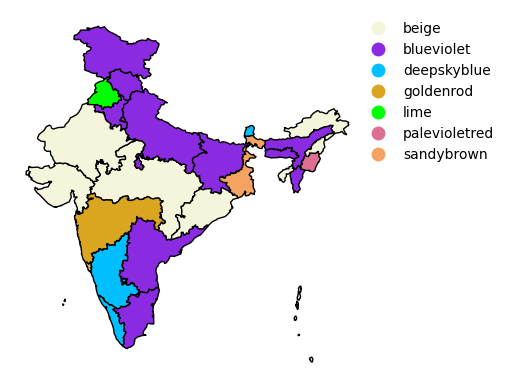

<Figure size 640x480 with 0 Axes>

In [129]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(50,30), dpi = 1200)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue', 'goldenrod', 'lime', 'palevioletred', 'sandybrown']
categories = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.4, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)


plt.show()

### Choropleth for set 2

In [139]:
merged = map_data.set_index('STATE').join(df_states_set2.set_index('State'))#.reset_index(level=0, inplace=True)
merged

,geometry,freq_count
STATE,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",NaN
ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",NaN
ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",NaN
ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",9.0
BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",NaN
CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",6.0
DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906...",NaN
DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",NaN
DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400...",NaN


In [140]:
df_states_set2['State'][7]='DELHI'
other_states = pd.DataFrame([{'State': 'RAJASTHAN', 'freq_count':0},
                {'State': 'ORISSA', 'freq_count':0},
                {'State': 'PONDICHERRY', 'freq_count':0},
                {'State': 'TRIPURA', 'freq_count':0},
                {'State': 'MADHYA PRADESH', 'freq_count':0},
                {'State': 'LAKSHADWEEP', 'freq_count':0},
                {'State': 'GUJARAT', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DADRA AND NAGAR HAVELI', 'freq_count':0},
                {'State': 'ARUNACHAL PRADESH', 'freq_count':0},
                {'State': 'ANDAMAN AND NICOBAR ISLANDS', 'freq_count':0},
                {'State': 'NAGALAND', 'freq_count':0},
                {'State': 'ANDHRA PRADESH', 'freq_count':0},
                {'State': 'BIHAR', 'freq_count':0},
                {'State': 'JAMMU AND KASHMIR', 'freq_count':0}])

df_states_set2 = pd.concat([df_states_set2, other_states], axis = 0)#.append(other_states, ignore_index=True)
cats=[]
for i in df_states_set2['freq_count']:
    if i==0:
        cat = 'beige'
        cats.append(cat)
    elif 0<i<10:
        cat= 'blueviolet'
        cats.append(cat)
    elif 10<=i<20:
        cat='deepskyblue'
        cats.append(cat)
    elif 20<=i<30:
        cat='palevioletred'
        cats.append(cat)
    else:
        cat='sandybrown'
        cats.append(cat)
print(len(df_states_set2))
print(len(cats))
df_states_set2['category'] = cats
df_states_set2

36
36


/tmp/ipykernel_125713/1101729776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_set2['State'][7]='DELHI'


,State,freq_count,category
0,WEST BENGAL,26,palevioletred
1,PUNJAB,25,palevioletred
2,GOA,22,palevioletred
3,MEGHALAYA,7,blueviolet
4,JHARKHAND,5,blueviolet
5,MAHARASHTRA,11,deepskyblue
6,TELANGANA,6,blueviolet
7,DELHI,4,blueviolet
8,MANIPUR,22,palevioletred
9,CHANDIGARH,6,blueviolet


In [142]:
merged = map_data.set_index('STATE').join(df_states_set2.set_index('State'))#.reset_index(level=0, inplace=True)
merged

,geometry,freq_count,category
STATE,,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",0,beige
ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",0,beige
ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",0,beige
ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",9,blueviolet
BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",0,beige
CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",6,blueviolet
DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906...",0,beige
DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",0,beige
DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",0,beige


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 3600x2400 with 0 Axes>

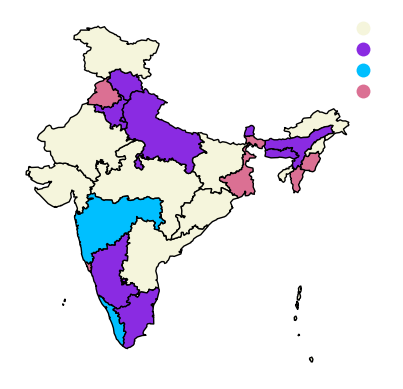

<Figure size 640x480 with 0 Axes>

In [147]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,8), dpi = 300)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue','palevioletred']#, 'sandybrown']

# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
for text in legend.get_texts():
    text.set_text('')
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.1, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)
plt.savefig('/home/debodeep94/OneDrive/Indian researcher/desidata/football/players_2014_19.png',bbox_inches='tight')
#plt.show()


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 60000x36000 with 0 Axes>

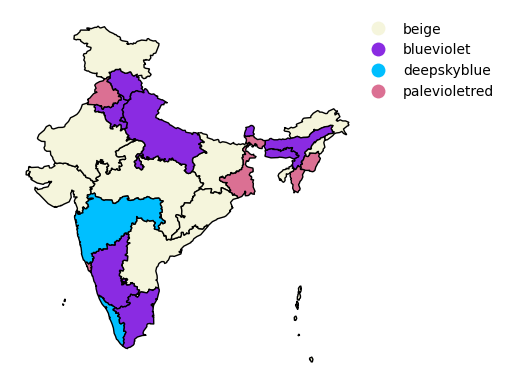

<Figure size 640x480 with 0 Axes>

In [148]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(50,30), dpi = 1200)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue', 'palevioletred']#, 'sandybrown']
categories = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.4, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)


plt.show()

### Choropleth for Set3

In [149]:
merged = map_data.set_index('STATE').join(df_states_set3.set_index('State'))#.reset_index(level=0, inplace=True)
merged

,geometry,freq_count
STATE,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",NaN
ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",NaN
ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",NaN
ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",1.0
BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",NaN
CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",3.0
DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906...",NaN
DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",NaN
DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400...",1.0


In [ ]:
df_states_set3 = df_states_set3.drop(11)
df_states_set3 = df_states_set3.drop(13)
other_states = pd.DataFrame([{'State': 'RAJASTHAN', 'freq_count':0},
                {'State': 'ORISSA', 'freq_count':0},
                {'State': 'PONDICHERRY', 'freq_count':0},
                {'State': 'TRIPURA', 'freq_count':0},
                {'State': 'MADHYA PRADESH', 'freq_count':0},
                {'State': 'LAKSHADWEEP', 'freq_count':0},
                {'State': 'GUJARAT', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DADRA AND NAGAR HAVELI', 'freq_count':0},
                {'State': 'ARUNACHAL PRADESH', 'freq_count':0},
                {'State': 'ANDAMAN AND NICOBAR ISLANDS', 'freq_count':0},
                {'State': 'NAGALAND', 'freq_count':0},
                {'State': 'ANDHRA PRADESH', 'freq_count':0},
                {'State': 'BIHAR', 'freq_count':0},
                {'State': 'JAMMU AND KASHMIR', 'freq_count':0},
                {'State': 'DELHI', 'freq_count':4}])

df_states_set3 = pd.concat([df_states_set3, other_states], axis = 0)#.append(other_states, ignore_index=True)
cats=[]
for i in df_states_set3['freq_count']:
    if i==0:
        cat = 'beige'
        cats.append(cat)
    elif 0<i<10:
        cat= 'blueviolet'
        cats.append(cat)
    elif 10<=i<20:
        cat='deepskyblue'
        cats.append(cat)
    elif 20<=i<30:
        cat='palevioletred'
        cats.append(cat)
    else:
        cat='sandybrown'
        cats.append(cat)
print(len(df_states_set2))
print(len(cats))
df_states_set3['category'] = cats
df_states_set3

In [170]:
df_states_set3

,State,freq_count
0,PUNJAB,13
1,WEST BENGAL,12
2,MAHARASHTRA,8
3,MANIPUR,18
4,CHANDIGARH,3
5,UTTAR PRADESH,3
6,GOA,14
7,MIZORAM,5
8,HIMACHAL PRADESH,3
9,KERALA,10


In [169]:
del df_states_set3['freq_count'][11]

SyntaxError: invalid syntax (410522956.py, line 1)

In [168]:
rough

,State,freq_count
0,PUNJAB,13
1,WEST BENGAL,12
2,MAHARASHTRA,8
3,MANIPUR,18
4,CHANDIGARH,3
5,UTTAR PRADESH,3
6,GOA,14
7,MIZORAM,5
8,HIMACHAL PRADESH,3
9,KERALA,10
